# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_data = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [8]:
queryUrl = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=Imperial&q="

cityName = []
lats = []
lngs = []
temp = []
windSpeeds = []
humidity = []
cloudiness = []
country = []
date = []
#set count holders to make the sets
counts = 0
sets = 1

for city in cities:
    try:
        wData = requests.get(queryUrl + city.replace(" ", "&")).json()
        lats.append(wData["coord"]["lat"])
        lngs.append(wData["coord"]["lon"])
        temp.append(wData["main"]["temp_max"])
        windSpeeds.append(wData["wind"]["speed"])
        humidity.append(wData["main"]["humidity"])
        cloudiness.append(wData["clouds"]["all"])
        country.append(wData["sys"]["country"])
        date.append(wData["dt"])
#Setup the counts and sets to  mange cities        
        if counts > 49:
            counts = 0
            sets += 1
            cityName.append(city)
                 
        else:
            counts += 1
            cityName.append(city)
            
        print(f"Proccessing Record {counts} of set {sets} | {city}")
              
    except KeyError:
        print("City was not found, Skipping...")
        


City was not found, Skipping...
Proccessing Record 1 of set 1 | rikitea
Proccessing Record 2 of set 1 | san patricio
Proccessing Record 3 of set 1 | nemuro
Proccessing Record 4 of set 1 | mahibadhoo
City was not found, Skipping...
Proccessing Record 5 of set 1 | fortuna
Proccessing Record 6 of set 1 | sweetwater
City was not found, Skipping...
Proccessing Record 7 of set 1 | albany
Proccessing Record 8 of set 1 | yanam
Proccessing Record 9 of set 1 | severo-kurilsk
Proccessing Record 10 of set 1 | boa vista
Proccessing Record 11 of set 1 | zhuhai
Proccessing Record 12 of set 1 | eureka
Proccessing Record 13 of set 1 | mecca
Proccessing Record 14 of set 1 | hervey bay
Proccessing Record 15 of set 1 | longyearbyen
Proccessing Record 16 of set 1 | bredasdorp
Proccessing Record 17 of set 1 | busselton
Proccessing Record 18 of set 1 | ust-nera
Proccessing Record 19 of set 1 | barrow
Proccessing Record 20 of set 1 | hidalgo
Proccessing Record 21 of set 1 | camana
Proccessing Record 22 of set

Proccessing Record 30 of set 4 | manta
Proccessing Record 31 of set 4 | vaitape
Proccessing Record 32 of set 4 | keetmanshoop
Proccessing Record 33 of set 4 | popondetta
Proccessing Record 34 of set 4 | arraial do cabo
Proccessing Record 35 of set 4 | santiago del estero
Proccessing Record 36 of set 4 | zhangye
Proccessing Record 37 of set 4 | yuanping
Proccessing Record 38 of set 4 | shubarshi
Proccessing Record 39 of set 4 | tiksi
Proccessing Record 40 of set 4 | laguna
Proccessing Record 41 of set 4 | karratha
Proccessing Record 42 of set 4 | anadyr
City was not found, Skipping...
Proccessing Record 43 of set 4 | boditi
Proccessing Record 44 of set 4 | meulaboh
Proccessing Record 45 of set 4 | manokwari
Proccessing Record 46 of set 4 | muros
Proccessing Record 47 of set 4 | flin flon
Proccessing Record 48 of set 4 | sorland
Proccessing Record 49 of set 4 | sharjah
Proccessing Record 50 of set 4 | severo-yeniseyskiy
Proccessing Record 0 of set 5 | bom jesus
City was not found, Skippi

Proccessing Record 4 of set 8 | escanaba
Proccessing Record 5 of set 8 | paamiut
Proccessing Record 6 of set 8 | mamit
Proccessing Record 7 of set 8 | jumla
Proccessing Record 8 of set 8 | kindu
Proccessing Record 9 of set 8 | mayumba
Proccessing Record 10 of set 8 | abeche
Proccessing Record 11 of set 8 | undory
Proccessing Record 12 of set 8 | coruripe
Proccessing Record 13 of set 8 | kavieng
Proccessing Record 14 of set 8 | port hardy
Proccessing Record 15 of set 8 | klaksvik
Proccessing Record 16 of set 8 | fujin
Proccessing Record 17 of set 8 | balagon
Proccessing Record 18 of set 8 | ekhabi
Proccessing Record 19 of set 8 | khandbari
Proccessing Record 20 of set 8 | ponta delgada
Proccessing Record 21 of set 8 | yerbogachen
Proccessing Record 22 of set 8 | atasu
Proccessing Record 23 of set 8 | salmo
Proccessing Record 24 of set 8 | airai
Proccessing Record 25 of set 8 | bathsheba
Proccessing Record 26 of set 8 | atar
Proccessing Record 27 of set 8 | copiapo
Proccessing Record 28 

Proccessing Record 37 of set 11 | paka
Proccessing Record 38 of set 11 | oxford
Proccessing Record 39 of set 11 | dobryanka
Proccessing Record 40 of set 11 | uvinza
Proccessing Record 41 of set 11 | indianola
City was not found, Skipping...
Proccessing Record 42 of set 11 | teacapan
Proccessing Record 43 of set 11 | serpa
Proccessing Record 44 of set 11 | alexandria


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weatherList = {"City":cityName, "Lat":lats, "Lng":lngs, "Max Temp":temp,
              "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":windSpeeds, "Country":country, "Date":date}
weatherDf = pd.DataFrame(weatherList)

weatherDf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.00,71,24,19.19,PF,1644198597
1,san patricio,13.3034,-4.8956,71.64,12,0,8.39,ML,1644198882
2,nemuro,43.3236,145.5750,28.83,71,25,11.81,JP,1644198882
3,mahibadhoo,3.7833,72.9667,80.98,65,65,10.54,MV,1644198882
4,fortuna,40.5982,-124.1573,54.19,91,0,0.00,US,1644198883


In [10]:
weatherDf.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,22.863293,20.500894,48.552852,73.166065,54.550542,7.517347,1.644199e+09
std,30.944740,86.207734,29.871959,20.853954,42.119504,6.757206,8.922437e+01
min,-54.800000,-175.200000,-40.410000,11.000000,0.000000,0.000000,1.644199e+09
25%,-0.929075,-51.589250,30.427500,63.000000,7.000000,3.000000,1.644199e+09
50%,25.290050,23.162250,56.595000,78.000000,61.500000,5.680000,1.644199e+09
75%,48.375950,91.871025,72.940000,88.750000,100.000000,9.445000,1.644199e+09
max,78.218600,179.316700,92.300000,100.000000,100.000000,56.800000,1.644199e+09


In [11]:
weatherDf.to_csv(city_data)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
maxHumidity = weatherDf[weatherDf["Humidity"] == 100]

print(maxHumidity)

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
64            upernavik  72.7868  -56.1549    -16.49       100         100   
67            saskylakh  71.9167  114.0833    -26.18       100          95   
159            udachnyy  66.4167  112.4000    -17.66       100          99   
171          kautokeino  69.0125   23.0412     -0.72       100         100   
202  severo-yeniseyskiy  60.3725   93.0408     -3.53       100          97   
216           ostersund  63.1792   14.6357     25.61       100         100   
269               mayna  54.1135   47.6231     -4.14       100         100   
275        krasnoselkup  65.7000   82.4667    -22.32       100          40   
317                teya  60.3778   92.6267     -1.30       100          94   
439          tarko-sale  64.9225   77.7850    -26.00       100          79   
459            nanchang  28.6833  115.8833     33.80       100         100   

     Wind Speed Country        Date  
64         7.74      GL  

In [13]:
weatherDf2 = weatherDf.drop([64,67,159,171,202,216,269,275,317,439,459])
weatherDf2.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,22.078790,19.594962,49.644954,72.622468,53.806630,7.575617,1.644199e+09
std,30.711927,86.536324,29.033825,20.707576,42.143725,6.806838,8.950934e+01
min,-54.800000,-175.200000,-40.410000,11.000000,0.000000,0.000000,1.644199e+09
25%,-1.072500,-52.532350,32.550000,62.500000,7.000000,3.000000,1.644199e+09
50%,24.600000,22.400700,58.060000,78.000000,56.000000,5.750000,1.644199e+09
75%,46.648600,87.800550,73.445000,88.000000,100.000000,9.530000,1.644199e+09
max,78.218600,179.316700,92.300000,99.000000,100.000000,56.800000,1.644199e+09


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weatherDf2.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.00,71,24,19.19,PF,1644198597
1,san patricio,13.3034,-4.8956,71.64,12,0,8.39,ML,1644198882
2,nemuro,43.3236,145.5750,28.83,71,25,11.81,JP,1644198882
3,mahibadhoo,3.7833,72.9667,80.98,65,65,10.54,MV,1644198882
4,fortuna,40.5982,-124.1573,54.19,91,0,0.00,US,1644198883


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

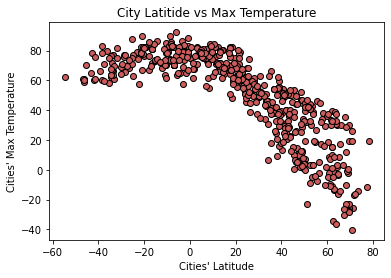

In [15]:
plt.scatter(weatherDf2["Lat"], weatherDf2["Max Temp"], edgecolors = "black", facecolors = "indianred")
plt.title("City Latitide vs Max Temperature")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Max Temperature")


plt.show()

## Latitude vs. Humidity Plot

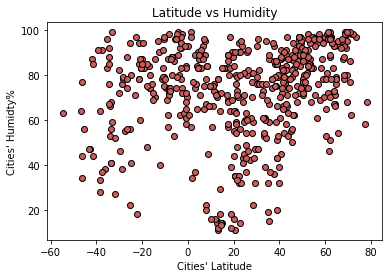

In [16]:
plt.scatter(weatherDf2["Lat"], weatherDf2["Humidity"], edgecolors = "black", facecolors = "indianred")
plt.title("Latitude vs Humidity")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Humidty%")

plt.show()

## Latitude vs. Cloudiness Plot

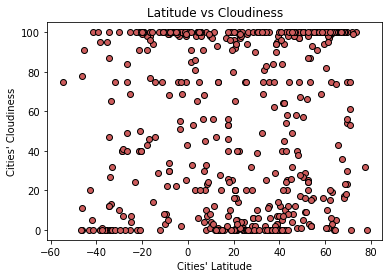

In [17]:
plt.scatter(weatherDf2["Lat"], weatherDf2["Cloudiness"], edgecolors = "black", facecolors = "indianred")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

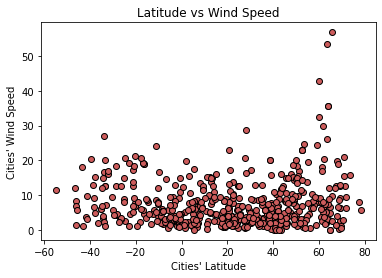

In [18]:
plt.scatter(weatherDf2["Lat"], weatherDf2["Wind Speed"], edgecolors = "black", facecolors = "indianred")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Cities' Latitude")
plt.ylabel("Cities' Wind Speed")

plt.show()

## Linear Regression

In [19]:
northernHemisphere = weatherDf2.loc[weatherDf2["Lat"] >= 0.0]
northernHemisphere.reset_index(inplace=True)
southernHemisphere = weatherDf2.loc[weatherDf2["Lat"] < 0.0]
southernHemisphere.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7398437041765542


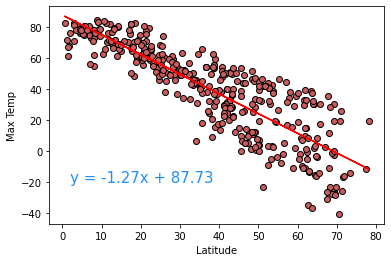

In [20]:
x_values = northernHemisphere["Lat"]
y_values = northernHemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolor = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-20),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.18581234982598663


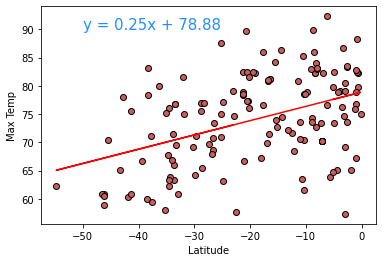

In [22]:
x_values = southernHemisphere["Lat"]
y_values = southernHemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13902903550031392


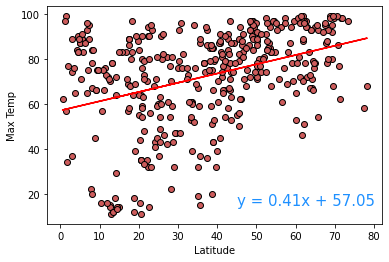

In [23]:
x_values = northernHemisphere["Lat"]
y_values = northernHemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1652225519082617


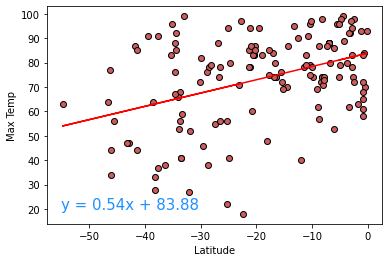

In [24]:
x_values = southernHemisphere["Lat"]
y_values = southernHemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.036672377231575515


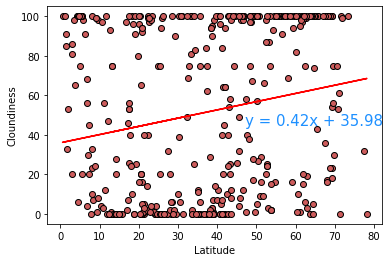

In [28]:
x_values = northernHemisphere["Lat"]
y_values = northernHemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,45),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Cloundiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2192801336373542


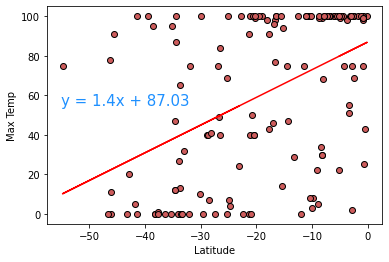

In [29]:
x_values = southernHemisphere["Lat"]
y_values = southernHemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043311129161895875


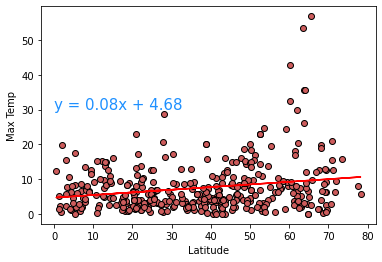

In [30]:
x_values = northernHemisphere["Lat"]
y_values = northernHemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06978450273445708


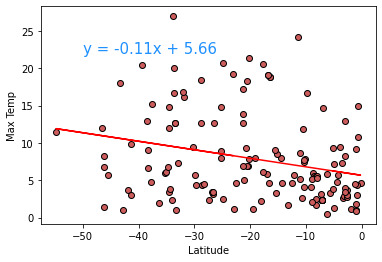

In [31]:
x_values = southernHemisphere["Lat"]
y_values = southernHemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "black", facecolors = "indianred")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="dodgerblue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()